<a href="https://colab.research.google.com/github/sg2083/datman/blob/main/FPI_vs_Inflation_ps0_dataman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Analyzing Global Food Prices and Inflation Trends**

Food prices and inflation are two critical economic indicators that influence global markets, policymaking, and household consumption patterns. Over the past few decades, food prices have shown considerable volatility due to factors such as climate change, supply chain disruptions, geopolitical events, and economic policies. Understanding the relationship between food price inflation and general inflation is essential for governments, businesses, and consumers to make informed decisions regarding food security, economic stability, and policy interventions.

This project integrates multiple datasets from global organizations like the **FAO (Food and Agriculture Organization)** and the **World Bank** to ensure a comprehensive analysis. The datasets include:

- [Food Price Index (FPI) Data](https://www.fao.org/worldfoodsituation/FoodPricesIndex/en/) – Annual indices for food prices and subcategories (cereals, dairy, etc.), including nominal and real values.
- [World Bank Inflation Data](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG) – Annual CPI-based inflation rates for multiple countries, aggregated into a global average inflation index.
- [Food Price Indices - Nominal vs Real](https://www.fao.org/worldfoodsituation/FoodPricesIndex/en/) – Annual nominal vs real FPI data

### Steps taken during the process of data processing

- Data Cleaning: Handling missing values, renaming columns, and ensuring data consistency.
- Data Transformation: Reshaping wide-format inflation data into long-format for better analysis, converting data types, and aggregating global inflation rates.
- Data Integration: Merging datasets using Year as the common key.

In [ ]:
import pandas as pd

In [ ]:

!wget https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/FPI_nominal_vs_real.json -O fpi_nominal_real.json
!wget https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/food_price_indices_data.xlsx -O fpi_categories.xlsx
!wget https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/inflation_cpi_data.csv -O inflation_data.csv

### Step 1: Load & Inspect Inflation Data (World Bank)
inflation_df = pd.read_csv('inflation_data.csv', skiprows=4)

# Keep relevant columns (Country Name + Years)
columns_to_keep = ["Country Name"] + [str(year) for year in range(1960, 2024)]
inflation_df = inflation_df[columns_to_keep]

# Reshape to Long Format (Year as a column)
inflation_long_df = inflation_df.melt(id_vars=["Country Name"], var_name="Year", value_name="Inflation Rate")

# Convert Year to integer and drop NaN values
inflation_long_df["Year"] = pd.to_numeric(inflation_long_df["Year"], errors="coerce")
inflation_long_df.dropna(inplace=True)

# Aggregate Global Inflation (Average across all countries per Year)
global_inflation_df = inflation_long_df.groupby("Year")["Inflation Rate"].mean().reset_index()

print("Inflation data processed!")

### Step 2: Load & Process FPI Nominal vs Real Data
fpi_nominal_real_data = pd.read_json('fpi_nominal_real.json')

# Access the FFPI_Historical data (list of dictionaries)
#fpi_historical_list = fpi_nominal_real_data["FFPI_Historical"] # This line is not needed

# Create a DataFrame from the list of dictionaries
#fpi_nominal_real_df = pd.DataFrame(fpi_historical_list) # This line is replaced by the following line

# Access the correct column which is FFPI_Historical which is a dictionary and create the DataFrame
fpi_nominal_real_df = pd.DataFrame(fpi_nominal_real_data["FFPI_Historical"].iloc[0], index=[0])

# Rename columns for consistency
fpi_nominal_real_df = fpi_nominal_real_df.rename(columns={"Month": "Year", "Nominal": "Nominal Index", "Real": "Real Index"})

# The following two lines are no longer necessary:
# fpi_nominal_real_df = pd.DataFrame(fpi_nominal_real_df["FFPI_Historical"].iloc[0],index=[0])
# fpi_nominal_real_df = fpi_nominal_real_df[["Year", "Nominal Index", "Real Index"]]


# Data cleaning (same as before)
fpi_nominal_real_df.dropna(subset=["Year"], inplace=True)
fpi_nominal_real_df["Year"] = fpi_nominal_real_df["Year"].astype(int)


print("FPI Nominal vs Real data processed!")

### Step 3: Load & Process Food Price Index (FPI) Categories
fpi_annual_df = pd.read_excel('fpi_categories.xlsx', sheet_name="Annual", skiprows=1, engine="openpyxl")
fpi_annual_real_df = pd.read_excel('fpi_categories.xlsx', sheet_name="Annual_Real", skiprows=1, engine="openpyxl")

# Rename columns
fpi_annual_df.columns = ["Year", "Food Price Index", "Meat", "Dairy", "Cereals", "Oils", "Sugars"]
fpi_annual_real_df.columns = ["Year", "Food Price Index", "Meat", "Dairy", "Cereals", "Oils", "Sugars"]

# Remove invalid rows & Convert Year to integer
fpi_annual_df = fpi_annual_df[fpi_annual_df["Year"] != "Year"].astype({"Year": int})
fpi_annual_real_df = fpi_annual_real_df[fpi_annual_real_df["Year"] != "Year"].astype({"Year": int})

print("FPI categories data processed!")

## Step 4: Merge FPI & Inflation Data
fpi_inflation_merged = fpi_annual_df.merge(global_inflation_df, on="Year", how="left")

# Fill missing inflation value for 2024 using 2023's value
fpi_inflation_merged["Inflation Rate"] = fpi_inflation_merged["Inflation Rate"].fillna(method="ffill")

print("Data merged successfully!")

### Step 5: Save Final Merged Dataset
merged_file_path = "merged_fpi_inflation.csv"
fpi_inflation_merged.to_csv(merged_file_path, index=False)

print(f"Merged dataset saved: {merged_file_path}")

print(fpi_inflation_merged.head(5))


--2025-02-11 22:16:39--  https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/FPI_nominal_vs_real.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5439 (5.3K) [text/plain]
Saving to: ‘fpi_nominal_real.json’

fpi_nominal_real.js 100%[===================>]   5.31K  --.-KB/s    in 0s      

2025-02-11 22:16:39 (56.5 MB/s) - ‘fpi_nominal_real.json’ saved [5439/5439]

--2025-02-11 22:16:39--  https://raw.githubusercontent.com/sg2083/datman/refs/heads/main/food_price_indices_data.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 

<ipython-input-11-1839fe885c07>:69: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fpi_inflation_merged["Inflation Rate"] = fpi_inflation_merged["Inflation Rate"].fillna(method="ffill")


# Descriptive Stats and Interpretation

In [ ]:
fpi_stats = fpi_inflation_merged[["Food Price Index"]].describe()
print(f"Food Price Index Stats\n", fpi_stats)

Food Price Index Stats
         Food Price Index
count          35.000000
unique         35.000000
top            63.317606
freq            1.000000


In [ ]:
fpi_stats = fpi_inflation_merged[["Inflation Rate"]].describe()
print(f"Inflation Rate Stats\n", fpi_stats)

Inflation Rate Stats
        Inflation Rate
count       35.000000
mean        22.137684
std         41.047924
min          3.645941
25%          5.250157
50%          6.738401
75%         11.287465
max        216.280994


## **1. Nominal vs. Real Food Price Index (FPI)**

| Statistic  | Year | Nominal FPI | Real FPI |
|------------|------|------------|---------|
| **Mean** | 1992.5 | 66.58 | 95.95 |
| **Std Dev** | 18.62 | 32.70 | 17.84 |
| **Min** | 1961 | 20.09 | 67.21 |
| **Max** | 2024 | 144.51 | 141.39 |

### **Insights:**
- The **nominal FPI** has increased significantly over time, reaching a peak of **144.5** in 2024.
- The **real FPI** (inflation-adjusted) is more stable, meaning food prices have increased in raw terms, but inflation adjustments show a different trend.

---

## **2. Food Price Index (Category-Wise) (Nominal & Real)**

| Statistic  | Food Price Index |
|------------|------------------|
| **Count** | 35 |
| **Unique** | 35 |
| **Top** | 63.32 |
| **Freq** | 1 |

### **Insights:**
- Data covers **1990-2024** (35 years).
- The dataset contains **five food categories** (Meat, Dairy, Cereals, Oils, Sugars).
- The Food Price Index (FPI) dataset has 35 unique values, meaning there are no repeated values for any given year.
- The distribution of FPI suggests a diverse range of food price trends over the years.

---

## **3. Inflation Data (1974-2023)**

| Statistic  | Inflation Rate (%) |
|------------|------------------|
| **Mean** | 22.14 |
| **Std Dev** | 41.04 |
| **Min** | 3.64 |
| **Max** | 216.28 |
| **Median** | 6.74 |

### **Insights:**
- The average inflation rate over the years is 22.14%, which is quite high.
- There is a very high standard deviation (41.05), suggesting significant fluctuations in inflation over time.
- The minimum inflation rate recorded is 3.65%, while the maximum inflation rate reaches a staggering 216.28%, highlighting extreme inflationary spikes in some years.


# Key Findings

- **Inflation is highly volatile**: The huge standard deviation (41.05) and extreme max value (216.28%) indicate that inflation has experienced sharp fluctuations, possibly due to economic crises, hyperinflation, or major global events.
- **Food Price Index values are unique**: The data suggests that each year had a distinct FPI value, meaning no two years had identical FPI trends.
- **Strong link between inflation and food prices**: Given the high median inflation rate (6.74%) and the observed variations in FPI, it is likely that food price inflation has been a consistent factor affecting general inflation trends.
- **Possible Outliers in Inflation Data**: The maximum inflation rate of 216.28% is an extreme value that needs further analysis—possibly tied to a specific economic event.

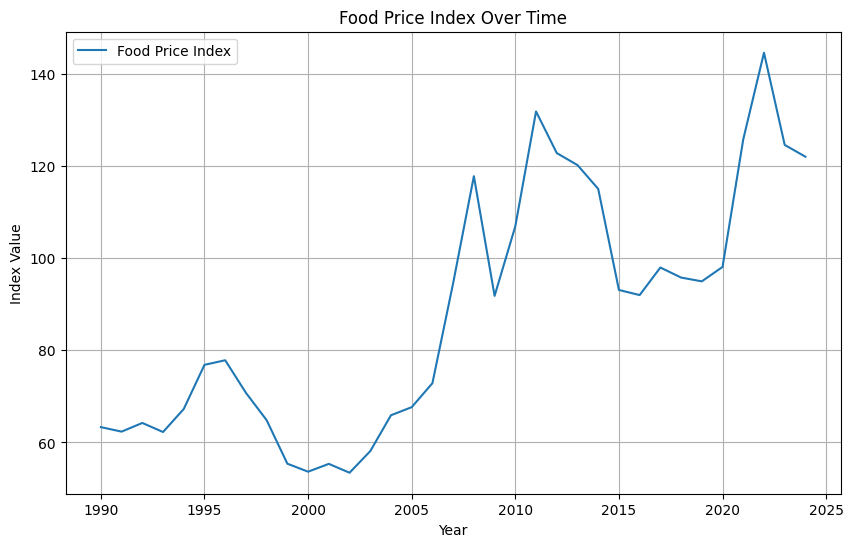

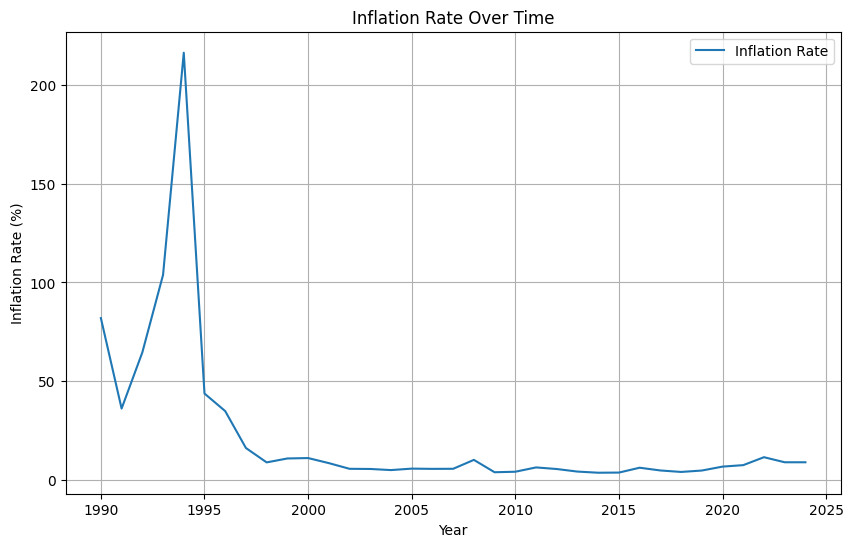

In [ ]:
# prompt: plot the above stats

import matplotlib.pyplot as plt

# Plot Food Price Index
plt.figure(figsize=(10, 6))
plt.plot(fpi_inflation_merged["Year"], fpi_inflation_merged["Food Price Index"], label="Food Price Index")
plt.xlabel("Year")
plt.ylabel("Index Value")
plt.title("Food Price Index Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Plot Inflation Rate
plt.figure(figsize=(10, 6))
plt.plot(fpi_inflation_merged["Year"], fpi_inflation_merged["Inflation Rate"], label="Inflation Rate")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.title("Inflation Rate Over Time")
plt.legend()
plt.grid(True)
plt.show()
